# Project: Creating CNN models and applying them to our data.


In [40]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import callbacks, optimizers
from keras.preprocessing.image import ImageDataGenerator
import keras,os
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential , Model
from keras.layers import Input,Dense, Conv2D , Flatten, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout, concatenate,MaxPool2D
from keras.optimizers import Adam
from keras.applications.inception_v3 import InceptionV3
import glob as gb
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
import itertools
from tensorflow.keras import layers

In [2]:
!pip install -U --no-cache-dir gdown --pre 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!gdown 1ryEsTmOYD98MRL03MQRHD5FL1KuL3RZB

Downloading...
From (uriginal): https://drive.google.com/uc?id=1ryEsTmOYD98MRL03MQRHD5FL1KuL3RZB
From (redirected): https://drive.google.com/uc?id=1ryEsTmOYD98MRL03MQRHD5FL1KuL3RZB&confirm=t&uuid=29b11a06-07ca-47f2-b620-b1b25f3cea3d
To: /content/NN_Project_2_Data.zip
100% 1.18G/1.18G [00:17<00:00, 68.1MB/s]


In [5]:
!unzip 'drive/MyDrive/NN_Project_2_Data.zip' -d '/content/drive/MyDrive'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Data/train/5/07f1a656b1584238990847.png  
  inflating: /content/drive/MyDrive/Data/train/5/a998f70931636275a7d59c.png  
  inflating: /content/drive/MyDrive/Data/train/5/4a55bbc7017f0f32bd7406.png  
  inflating: /content/drive/MyDrive/Data/train/5/c486fefeacad886fb20c6c.png  
  inflating: /content/drive/MyDrive/Data/train/5/ef2f6f97c71f6d11d750ed.png  
  inflating: /content/drive/MyDrive/Data/train/5/0819cc67a2edc006b7ddf6.png  
  inflating: /content/drive/MyDrive/Data/train/5/b5016eef17579d81e3ea09.png  
  inflating: /content/drive/MyDrive/Data/train/5/975198abbfa4ca82b7739d.png  
  inflating: /content/drive/MyDrive/Data/train/5/2f4b6889276a32dfb42300.png  
  inflating: /content/drive/MyDrive/Data/train/5/ee0afc54a8e053784c6b4b.png  
  inflating: /content/drive/MyDrive/Data/train/5/6201bff2a5f0b757913213.png  
  inflating: /content/drive/MyDrive/Data/train/5/c45b07932a0e01c6477013.png  
  inflating: 

In [5]:
trainn_path="/content/drive/MyDrive/Data/train"
train_for_display = "/content/drive/MyDrive/Data/"
testt_path="/content/drive/MyDrive/Data/test"

In [6]:
# Dispalying all the classes with the number of files contained within.
for folder in os.listdir(train_for_display+'train'):
  files = gb.glob(pathname= str(train_for_display +'train//' + folder + '/*.png'))
  print(f'In training file, found {len(files)} in folder {folder}')

In training file, found 91 in folder 12
In training file, found 26 in folder 37
In training file, found 19 in folder 20
In training file, found 21 in folder 26
In training file, found 21 in folder 15
In training file, found 20 in folder 33
In training file, found 21 in folder 3
In training file, found 19 in folder 23
In training file, found 18 in folder 44
In training file, found 31 in folder 100
In training file, found 46 in folder 89
In training file, found 36 in folder 35
In training file, found 29 in folder 85
In training file, found 41 in folder 97
In training file, found 50 in folder 17
In training file, found 18 in folder 34
In training file, found 55 in folder 64
In training file, found 20 in folder 2
In training file, found 167 in folder 72
In training file, found 18 in folder 6
In training file, found 28 in folder 63
In training file, found 73 in folder 39
In training file, found 120 in folder 86
In training file, found 87 in folder 5
In training file, found 83 in folder 25
I

In [7]:
img_height, img_width, batch_size = 150 , 150 , 32

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  trainn_path,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12753 files belonging to 104 classes.
Using 11478 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  trainn_path,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12753 files belonging to 104 classes.
Using 1275 files for validation.


In [10]:
CLASSES = ['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',         # 00 - 09
           'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', # 10 - 19
           'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         # 20 - 29
           'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           # 30 - 39
           'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      # 40 - 49
           'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    # 50 - 59
           'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            # 60 - 69
           'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             # 70 - 79
           'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            # 80 - 89
           'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        # 90 - 99
           'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose']

In [11]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '100', '101', '102', '103', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


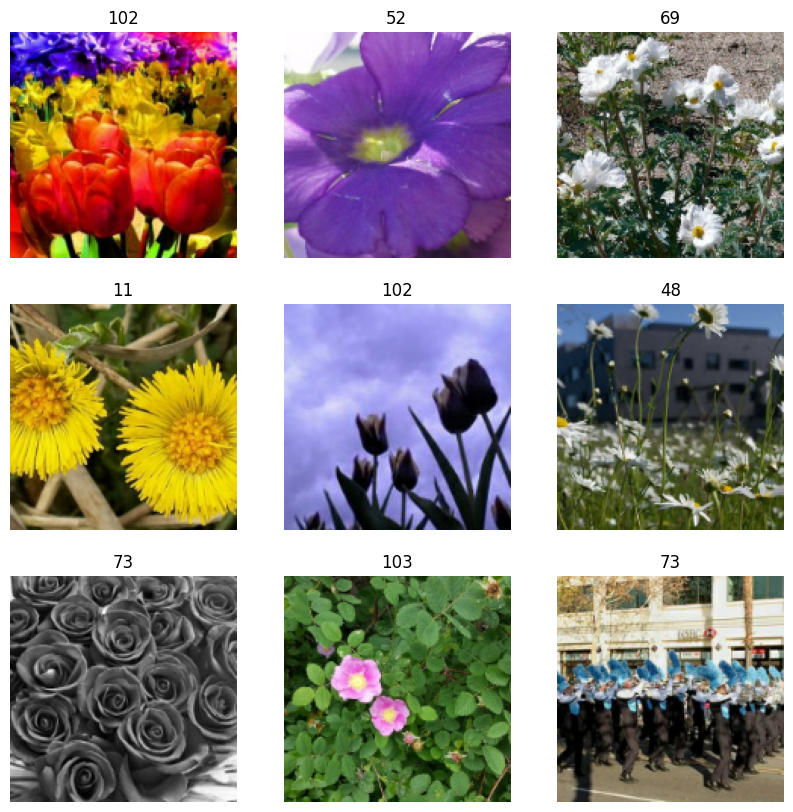

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")

In [13]:
# normalization of data for the manual model
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_train = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_val = val_ds.map(lambda x, y: (normalization_layer(x), y))
# to see results of normalization in one image
image_batch, labels_batch = next(iter(normalized_train))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(" minimum value => ", np.min(first_image)," , maximum value => ", np.max(first_image))
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])



num_classes = 104

manual_model = tf.keras.Sequential([
    data_augmentation,
  tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
               strides=2, padding="same",
               activation="relu", input_shape=(150, 150, 3)),
               
  tf.keras.layers.Conv2D(64,  kernel_size=(3, 3),
               strides=2, padding="same",
               activation="relu"),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2,
                     padding="valid"),
                     tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128,  kernel_size=(3, 3),
               strides=2, padding="same",
               activation="relu"),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2,
                     padding="valid"),
  tf.keras.layers.Conv2D(256, kernel_size=(3, 3),
               strides=2, padding="same",
               activation="relu"),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2,
                     padding="valid"),
                     tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(130, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

 minimum value =>  0.0  , maximum value =>  0.99568623


In [14]:
manual_model.compile(
  optimizer=Adam(learning_rate=0.002,decay=0.0009,amsgrad=True),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])
manual_model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.002,
 'decay': 0.0009,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': True}

In [15]:
manual_model.build(( None,150,150,3))
manual_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 75, 75, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 19, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                      

In [18]:
manual_save = "/content/drive/MyDrive/NN/Manual_model"
#manual_model.load_weights(manual_save)

In [18]:
checkpoint = keras.callbacks.ModelCheckpoint(manual_save, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto',save_freq='epoch')

history = manual_model.fit(
  normalized_train,
  validation_data=normalized_val,
  epochs=10,
  callbacks=[checkpoint])

Epoch 1/10
359/359 [==============================] - ETA: 0s - loss: 4.0055 - accuracy: 0.0775

359/359 [==============================] - 51s 116ms/step - loss: 4.0055 - accuracy: 0.0775 - val_loss: 3.7673 - val_accuracy: 0.1137
Epoch 2/10
357/359 [============================>.] - ETA: 0s - loss: 3.4162 - accuracy: 0.1550

359/359 [==============================] - 41s 114ms/step - loss: 3.4157 - accuracy: 0.1553 - val_loss: 3.1424 - val_accuracy: 0.1820
Epoch 3/10
357/359 [============================>.] - ETA: 0s - loss: 3.1155 - accuracy: 0.1963

359/359 [==============================] - 42s 114ms/step - loss: 3.1164 - accuracy: 0.1963 - val_loss: 2.9549 - val_accuracy: 0.2125
Epoch 4/10
359/359 [==============================] - ETA: 0s - loss: 2.9812 - accuracy: 0.2165

359/359 [==============================] - 40s 110ms/step - loss: 2.9812 - accuracy: 0.2165 - val_loss: 2.9041 - val_accuracy: 0.2384
Epoch 5/10
357/359 [============================>.] - ETA: 0s - loss: 2.8759 - accuracy: 0.2357

359/359 [==============================] - 39s 106ms/step - loss: 2.8757 - accuracy: 0.2356 - val_loss: 2.8051 - val_accuracy: 0.2431
Epoch 6/10
357/359 [============================>.] - ETA: 0s - loss: 2.7843 - accuracy: 0.2585

359/359 [==============================] - 40s 110ms/step - loss: 2.7849 - accuracy: 0.2585 - val_loss: 2.7194 - val_accuracy: 0.2698
Epoch 7/10
357/359 [============================>.] - ETA: 0s - loss: 2.7067 - accuracy: 0.2722

359/359 [==============================] - 39s 106ms/step - loss: 2.7078 - accuracy: 0.2724 - val_loss: 2.6680 - val_accuracy: 0.2816
Epoch 8/10
357/359 [============================>.] - ETA: 0s - loss: 2.6276 - accuracy: 0.2911

359/359 [==============================] - 39s 106ms/step - loss: 2.6294 - accuracy: 0.2913 - val_loss: 2.5791 - val_accuracy: 0.3200
Epoch 9/10
357/359 [============================>.] - ETA: 0s - loss: 2.5541 - accuracy: 0.3107

359/359 [==============================] - 39s 106ms/step - loss: 2.5546 - accuracy: 0.3103 - val_loss: 2.5541 - val_accuracy: 0.3122
Epoch 10/10
357/359 [============================>.] - ETA: 0s - loss: 2.4959 - accuracy: 0.3178

359/359 [==============================] - 43s 119ms/step - loss: 2.4961 - accuracy: 0.3178 - val_loss: 2.4675 - val_accuracy: 0.3404


In [19]:
#!mkdir -p saved_model
manual_model.save('saved_model/my_model')
saved_manual_model = tf.keras.models.load_model('saved_model/my_model')

In [20]:
manual_model.metrics_names

['loss', 'accuracy']

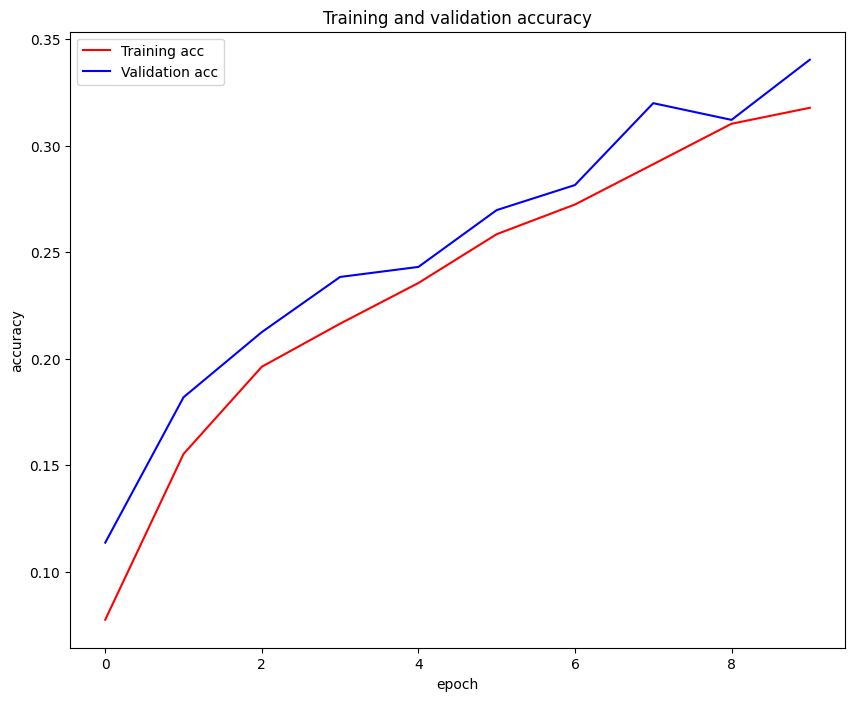

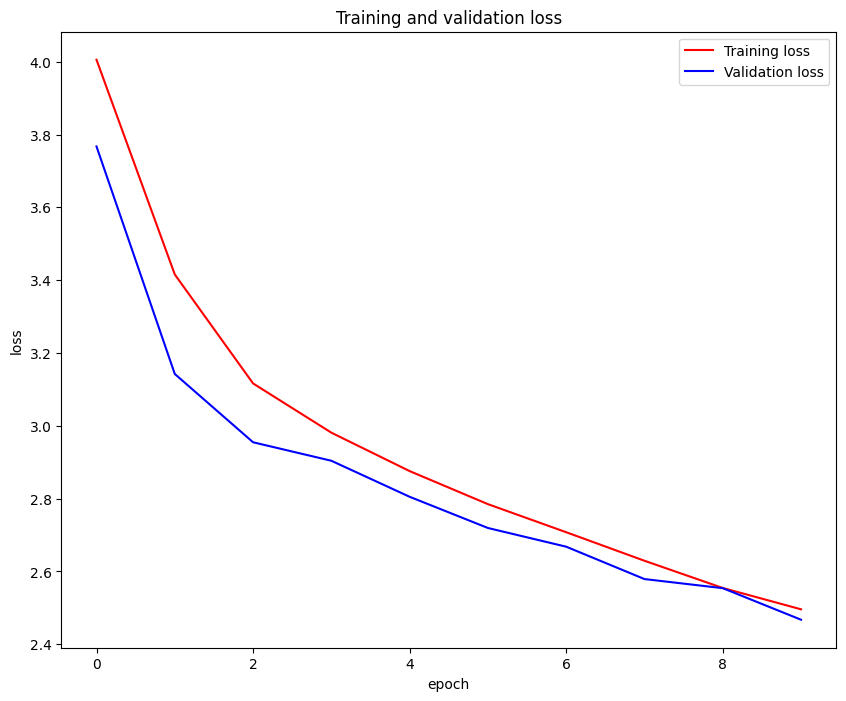

In [21]:
#Graphing our training and validation
plt.figure(figsize=(10,8))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure(figsize=(10,8))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()
plt.show()

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_batches = test_datagen.flow_from_directory(
        # This is the target directory
        testt_path,
        # All images will be resized to 150*150
        target_size=(150, 150),
        batch_size=32,
        class_mode='sparse')

Found 3712 images belonging to 104 classes.


In [20]:
#Evaluating manual_model
manual_model.evaluate(test_batches)

116/116 [==============================] - 20s 158ms/step - loss: 2.4679 - accuracy: 0.0286


[2.4678990840911865, 0.028556033968925476]

In [22]:
def test(model,testgenerator):
    # Predictions and true labels lists
    labels,pred = [],[]
    while len(labels) < 3712:
        # get images and labels from batch
        images, y = testgenerator.next()
        # Predicting the label of each batch
        pred_output = model.predict(images)
        # Adding prediction and labels to list
        pred.extend(pred_output)
        labels.extend(y)
    return labels,pred

In [64]:
#F1 and predictions for manual model : 
y_true,p=test(manual_model,test_batches)
pred=[np.argmax(elements) for elements in p]
f1_score(y_true,pred, average='macro')

1/1 [==============================] - 0s 77ms/step


0.24546131782735287

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(40,40))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Confusion matrix

Confusion matrix, without normalization
[[49  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  2]]


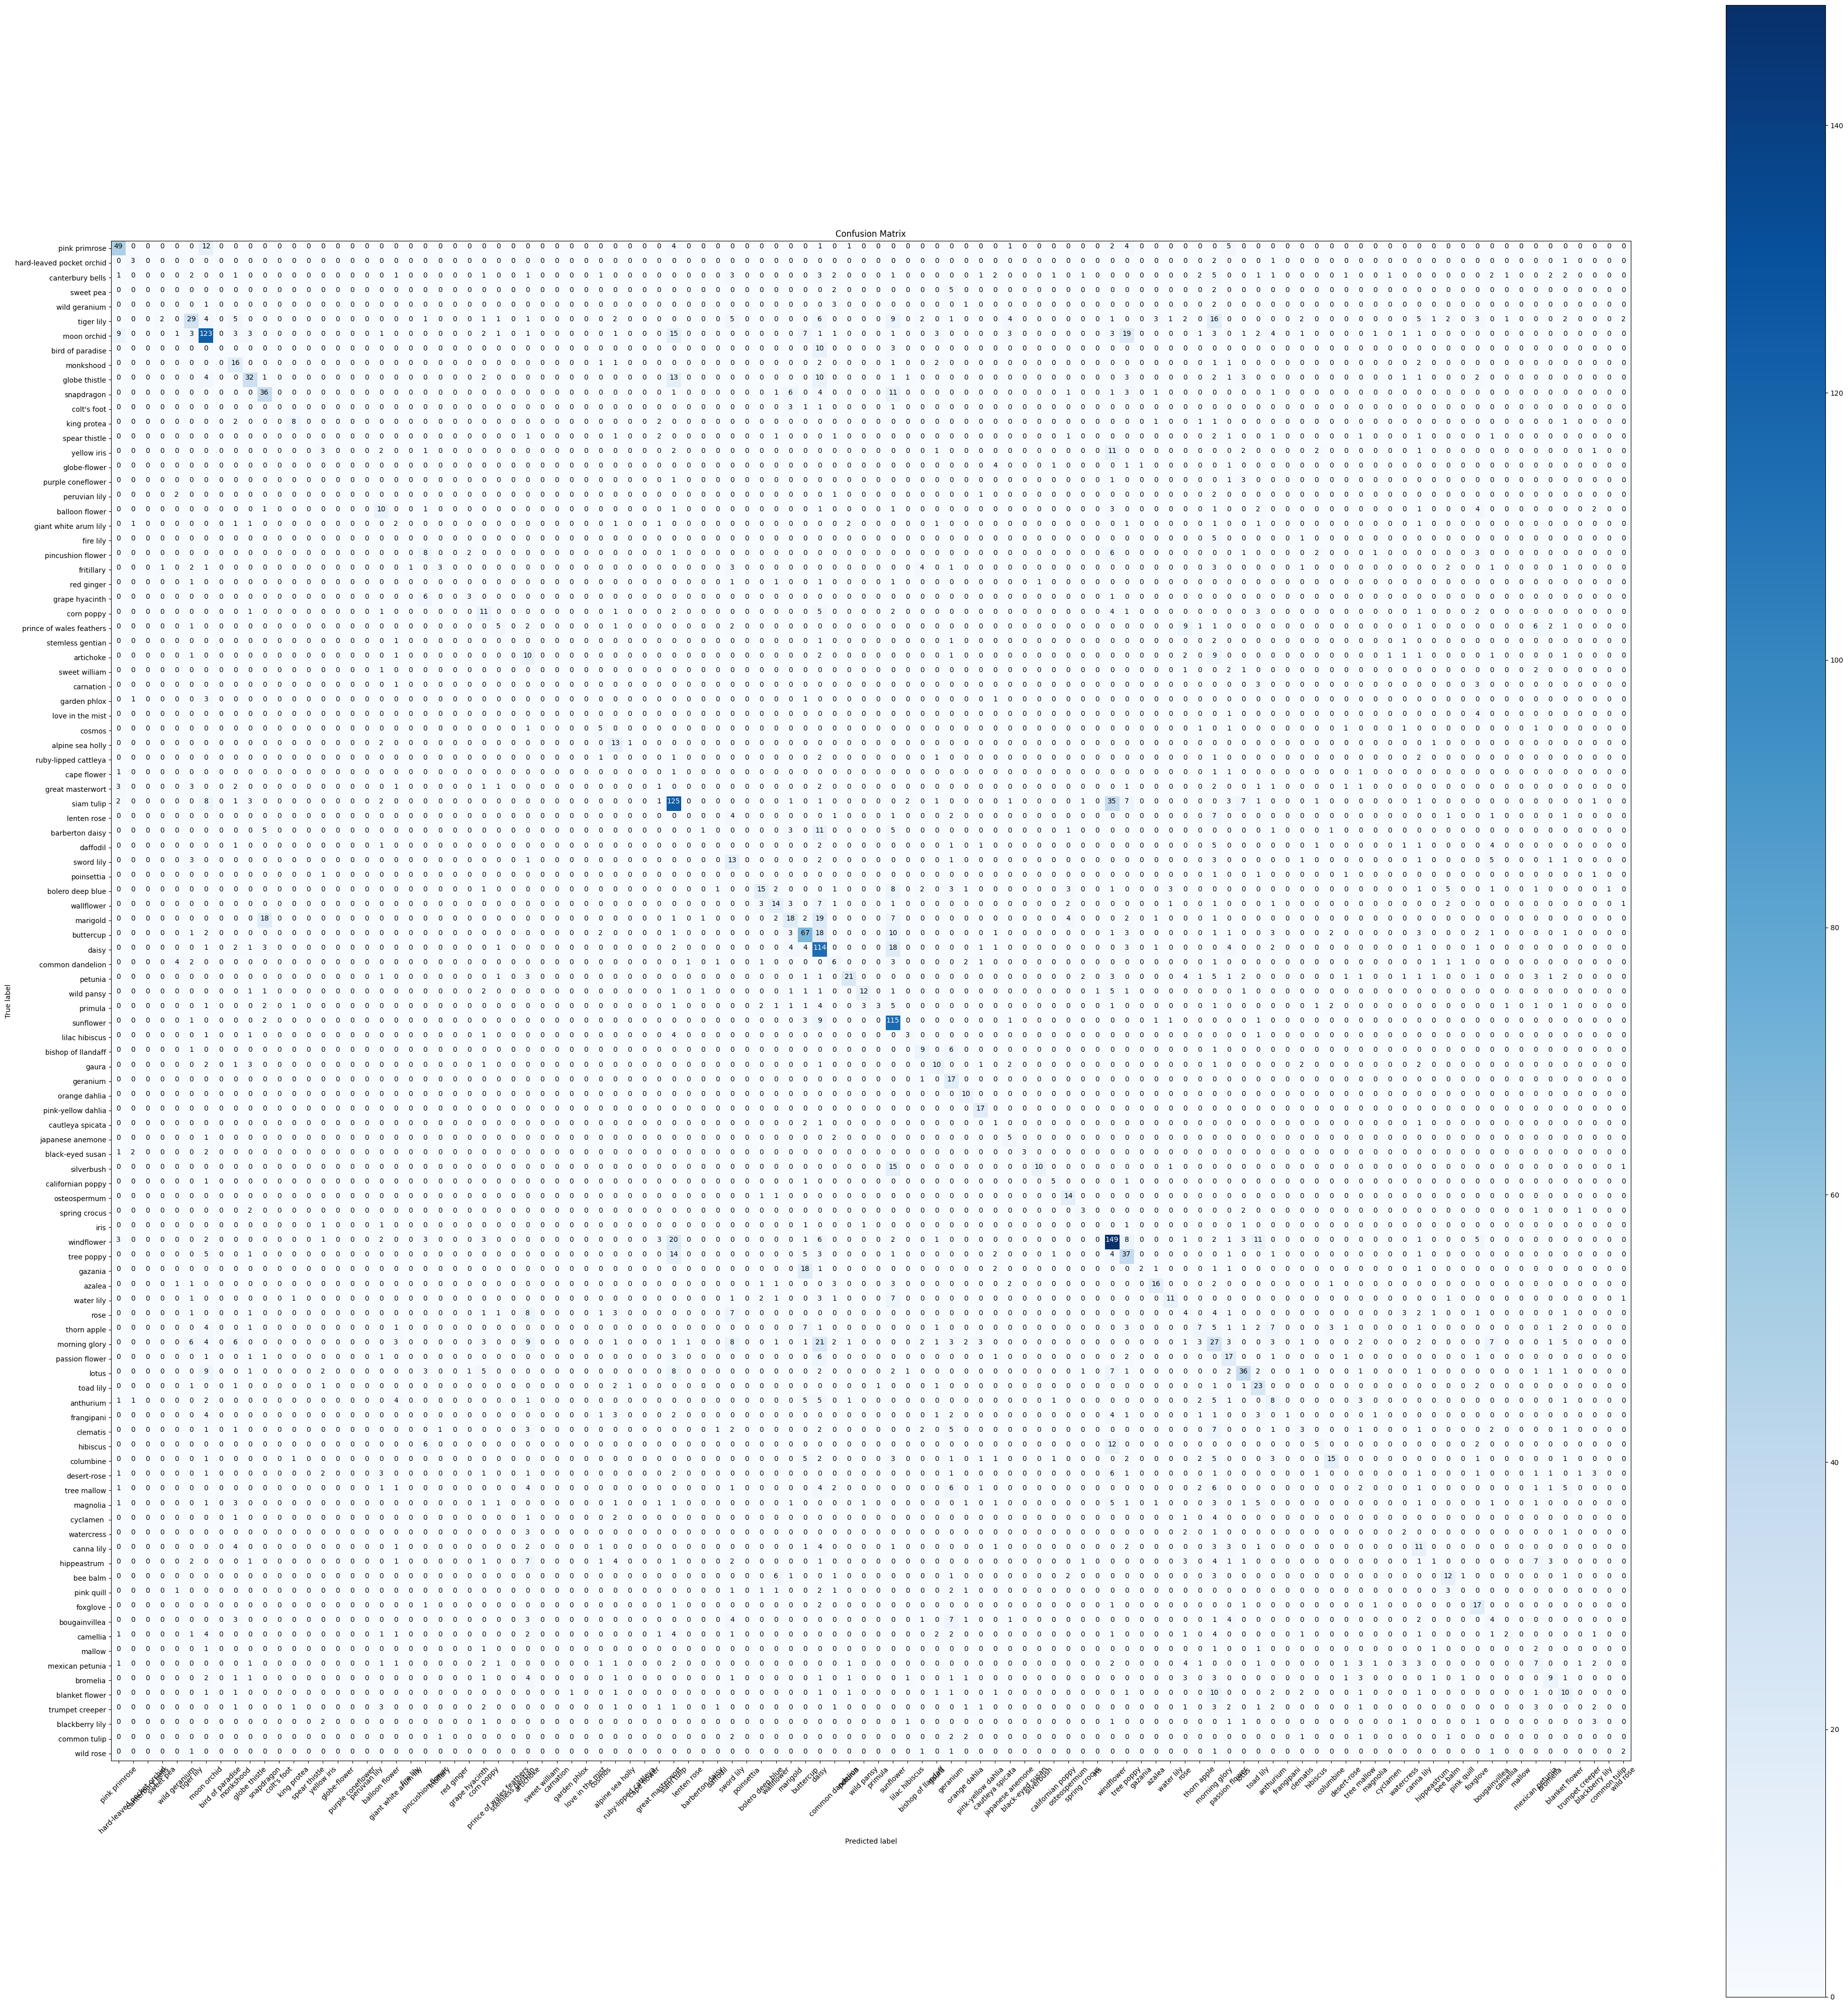

In [66]:
#true_classes = test_batches.classes
#trans_pred = manual_model.predict(test_batches)
#y_classes=[np.argmax(elements) for elements in trans_pred]
cm = confusion_matrix(y_true ,pred)
plot_confusion_matrix(cm=cm, classes=CLASSES, title='Confusion Matrix')

In [31]:
test_imgs,tl=next(test_batches)

In [32]:
test_labels=[]
for i in range(32):
    n=int((tl[i]))
    test_labels.append(n)
print(n)
print(test_labels)

24
[89, 53, 5, 55, 75, 2, 80, 77, 63, 66, 10, 79, 6, 10, 24, 6, 87, 46, 38, 53, 77, 76, 38, 38, 71, 81, 48, 84, 5, 11, 69, 24]


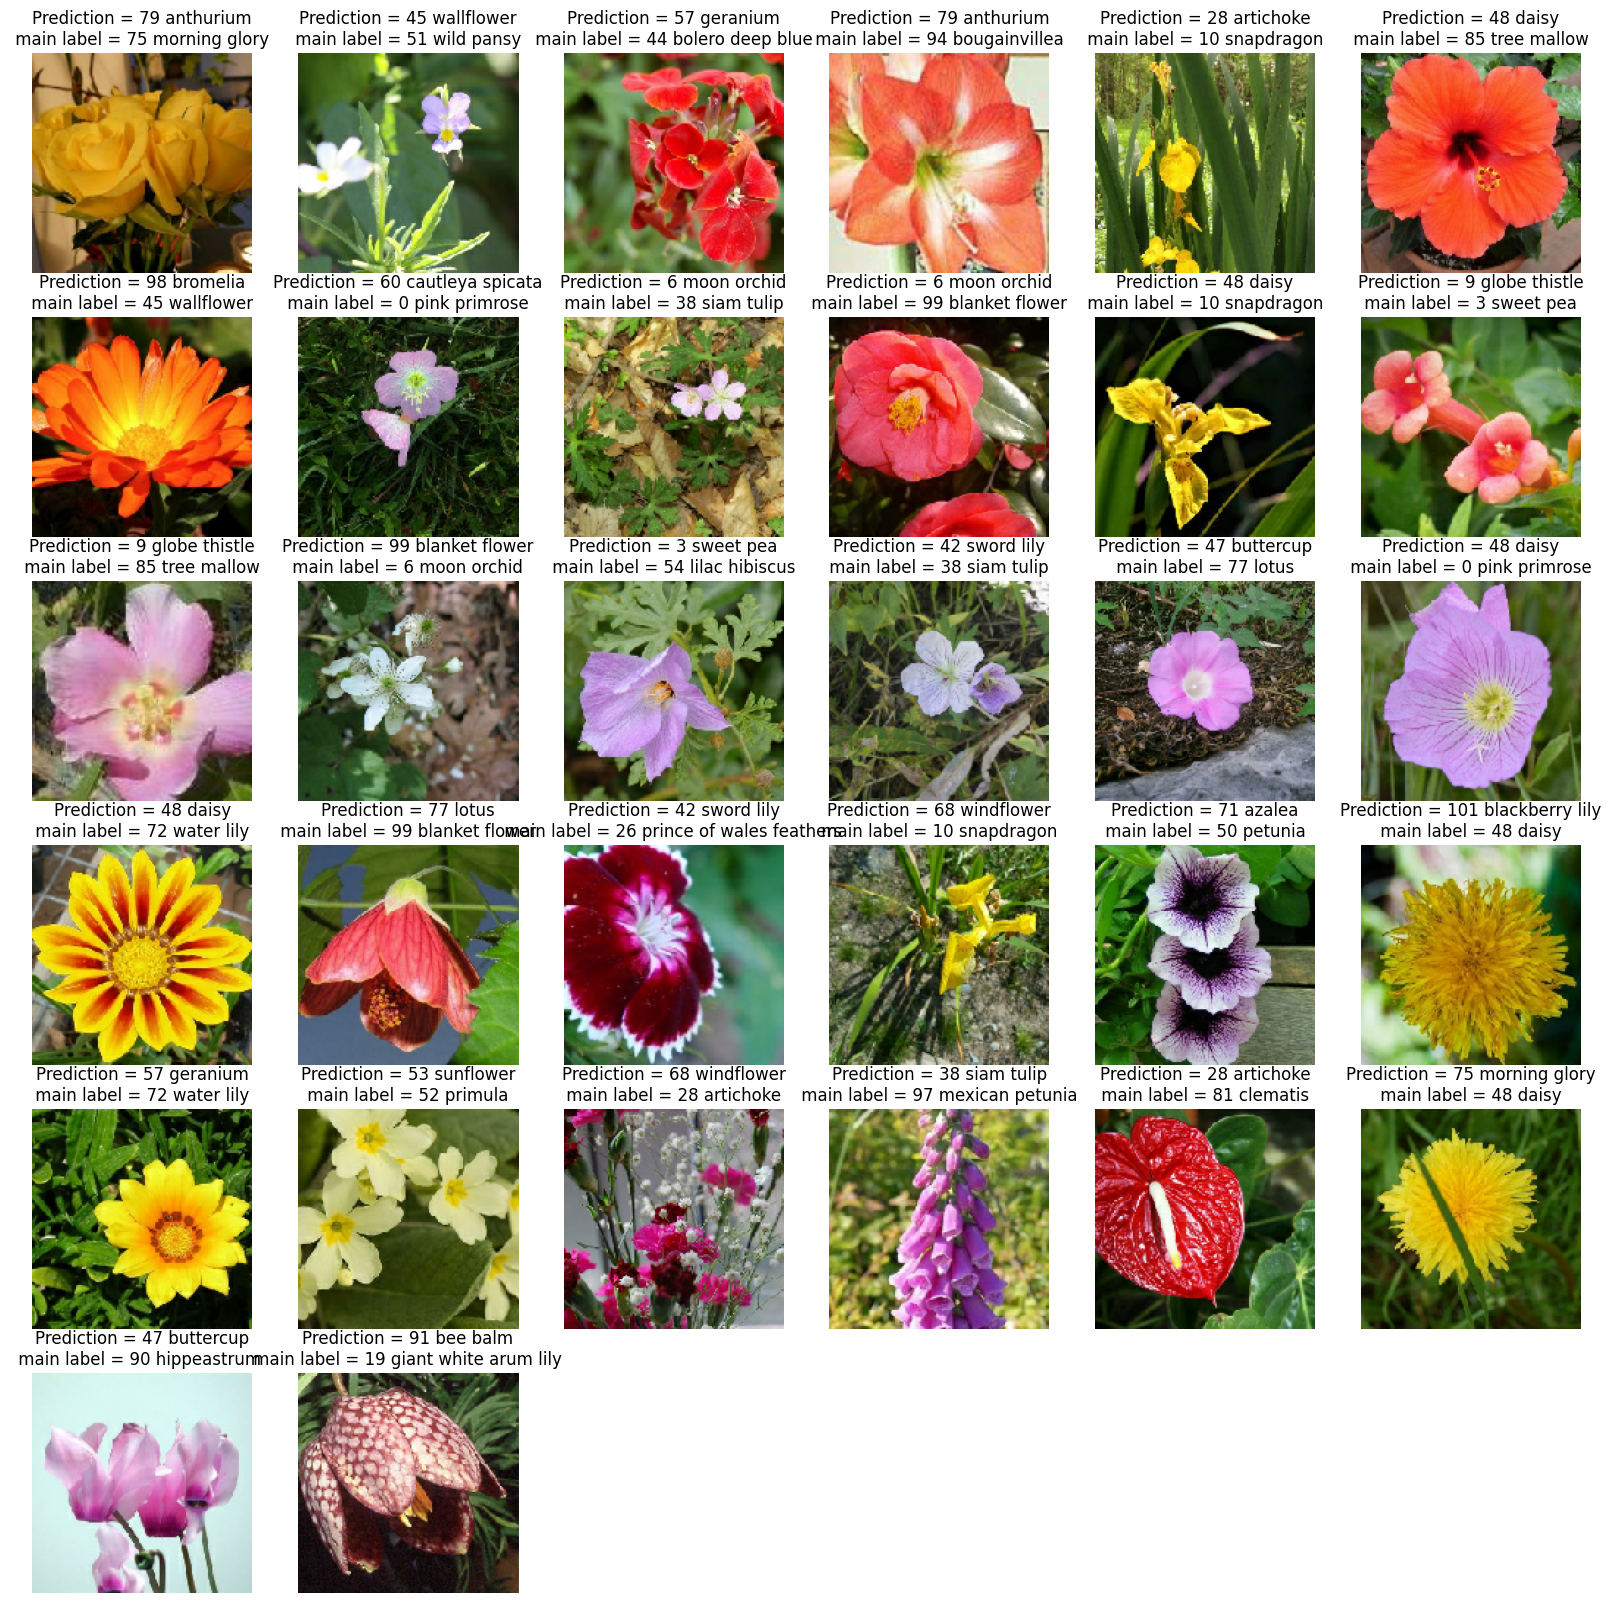

In [69]:
plt.figure(figsize=(20,20))
for i in range(len(test_imgs)):
  plt.subplot(6,6,i+1)
  plt.imshow(test_imgs[i])
  plt.axis('off')
  prediction=(pred[i])
  main_label=int(test_labels[i])
  plt.title(f"Prediction = {prediction} {CLASSES[prediction]}\n main label = {main_label} {CLASSES[main_label]} ")

#GoogLeNet Model

In [23]:
def GoogLeNet():
  # input layer 
          input_layer = Input(shape = (150, 150, 3))

          # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
          X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

          # max-pooling layer: pool_size = (3,3), strides = 2
          X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

          # convolutional layer: filters = 64, strides = 1
          X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

          # convolutional layer: filters = 192, kernel_size = (3,3)
          X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

          # max-pooling layer: pool_size = (3,3), strides = 2
          X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

          # 1st Inception block
          X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

          # 2nd Inception block
          X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

          # max-pooling layer: pool_size = (3,3), strides = 2
          X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

          # 3rd Inception block
          X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

          # Extra network 1:
          X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
          X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
          X1 = Flatten()(X1)
          X1 = Dense(1024, activation = 'relu')(X1)
          X1 = Dropout(0.7)(X1)
          X1 = Dense(104, activation = 'softmax')(X1)


          # 4th Inception block
          X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

          # 5th Inception block
          X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

          # 6th Inception block
          X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

          # Extra network 2:
          X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
          X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
          X2 = Flatten()(X2)
          X2 = Dense(1024, activation = 'relu')(X2)
          X2 = Dropout(0.7)(X2)
          X2 = Dense(104, activation = 'softmax')(X2)


          # 7th Inception block
          X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                              f3_conv5 = 128, f4 = 128)

          # max-pooling layer: pool_size = (3,3), strides = 2
          X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

          # 8th Inception block
          X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

          # 9th Inception block
          X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

          # Global Average pooling layer 
          X = GlobalAveragePooling2D(name = 'GAPL')(X)

          # Dropoutlayer 
          X = Dropout(0.4)(X)

          # output layer 
          X = Dense(104, activation = 'softmax')(X)

          # model
          model3 = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')

          return model3

In [24]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  # Input: 
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

      # 1st path:
      path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

      # 2nd path
      path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
      path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

      # 3rd path
      path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
      path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

      # 4th path
      path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
      path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

      output_layer = concatenate([path1, path2, path3, path4], axis = -1)

      return output_layer

In [25]:
googlenet_model = GoogLeNet()

In [26]:
googlenet_model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [27]:
googlenet_model.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 72, 72, 64)   9472        ['input_1[0][0]']                
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 35, 35, 64)  0           ['conv2d_4[0][0]']               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 35, 35, 64)   4160        ['max_pooling2d_3[0][0]']

In [75]:
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
googlenet_save = "/content/drive/MyDrive/NN/googlenet_model"
#googlenet_model.load_weights(googlenet_save)

In [77]:
googlenet_save = "/content/drive/MyDrive/NN/googlenet_model"
#checkpoint3 = keras.callbacks.ModelCheckpoint(googlenet_save, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto',save_freq='epoch')
history3 =googlenet_model.fit(
  normalized_train,
  validation_data=normalized_val,
  epochs=10,
  #callbacks=[checkpoint3]
  )

Epoch 1/10
359/359 [==============================] - 985s 3s/step - loss: 11.5650 - dense_15_loss: 3.8463 - dense_12_loss: 3.8473 - dense_14_loss: 3.8714 - dense_15_accuracy: 0.0953 - dense_12_accuracy: 0.0954 - dense_14_accuracy: 0.0915 - val_loss: 11.3285 - val_dense_15_loss: 3.7883 - val_dense_12_loss: 3.7505 - val_dense_14_loss: 3.7896 - val_dense_15_accuracy: 0.1114 - val_dense_12_accuracy: 0.1161 - val_dense_14_accuracy: 0.1129
Epoch 2/10
359/359 [==============================] - 869s 2s/step - loss: 11.0092 - dense_15_loss: 3.6842 - dense_12_loss: 3.6130 - dense_14_loss: 3.7120 - dense_15_accuracy: 0.1248 - dense_12_accuracy: 0.1409 - dense_14_accuracy: 0.1267 - val_loss: 10.3268 - val_dense_15_loss: 3.4747 - val_dense_12_loss: 3.3618 - val_dense_14_loss: 3.4903 - val_dense_15_accuracy: 0.1373 - val_dense_12_accuracy: 0.1710 - val_dense_14_accuracy: 0.1490
Epoch 3/10
359/359 [==============================] - 868s 2s/step - loss: 10.0073 - dense_15_loss: 3.3424 - dense_12_loss

In [78]:
#Evaluating GoogleNet
googlenet_model.evaluate(test_batches)

116/116 [==============================] - 74s 627ms/step - loss: 7.3238 - dense_15_loss: 2.4584 - dense_12_loss: 2.3732 - dense_14_loss: 2.4922 - dense_15_accuracy: 0.3464 - dense_12_accuracy: 0.3685 - dense_14_accuracy: 0.3464


[7.323792457580566,
 2.4583961963653564,
 2.373220443725586,
 2.4921765327453613,
 0.34644395112991333,
 0.36853447556495667,
 0.34644395112991333]

In [ ]:
#F1 and predictions for GoogleNet model : 
y_true,p=test(googlenet_model,test_batches)
pred=[np.argmax(elements) for elements in p]
f1_score(y_true,pred, average='macro')

In [80]:
googlenet_model.metrics_names

['loss',
 'dense_15_loss',
 'dense_12_loss',
 'dense_14_loss',
 'dense_15_accuracy',
 'dense_12_accuracy',
 'dense_14_accuracy']

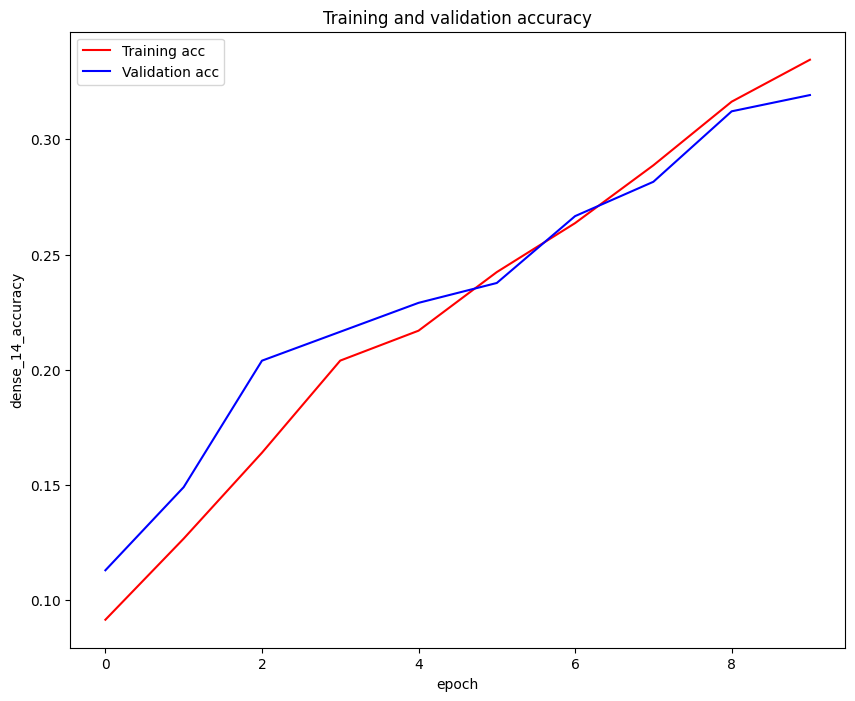

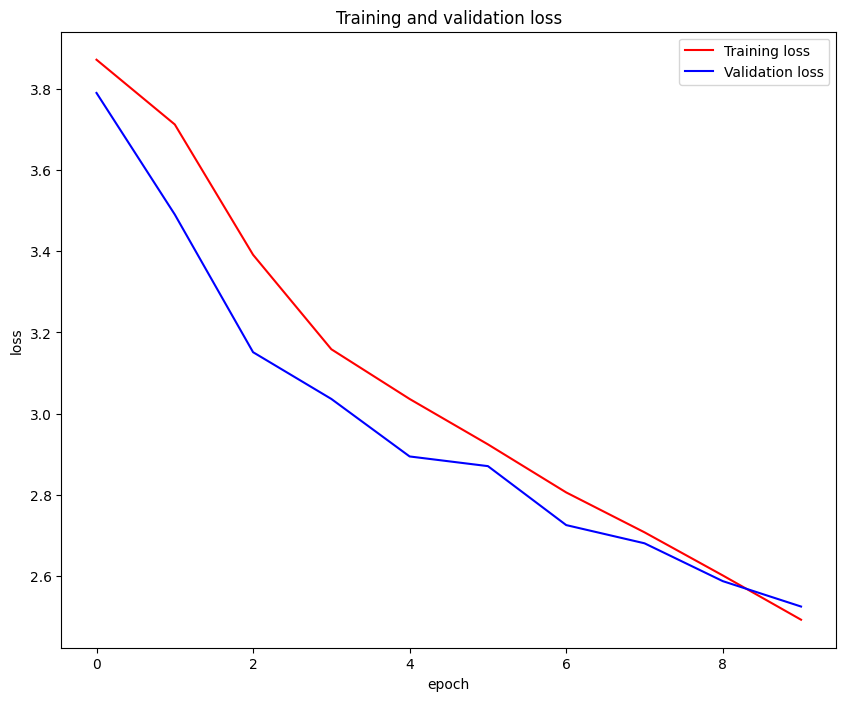

In [82]:
#Graphing our training and validation
plt.figure(figsize=(10,8))
acc = history3.history['dense_14_accuracy']
val_acc = history3.history['val_dense_14_accuracy']
loss = history3.history['dense_14_loss']
val_loss = history3.history['val_dense_14_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('dense_14_accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure(figsize=(10,8))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()
plt.show()

#The VGG model

In [24]:
# VGG 16 Layers

input = Input(shape =(150,150,3))
# 1st Conv Block

x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 3rd Conv block

x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# Fully connected layers

x = Flatten()(x)
x = Dense(units = 4096, activation ='relu')(x)
x = Dense(units = 4096, activation ='relu')(x)
output = Dense(units = 104, activation ='softmax')(x)

In [25]:
VGG_model = Model (inputs=input, outputs =output)

In [26]:
VGG_model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [27]:
VGG_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 128)       147584    
                                                             

In [28]:
VGG_save = "/content/drive/MyDrive/NN/VGG_model"
VGG_model.load_weights(VGG_save)

In [20]:
#checkpoint4 = keras.callbacks.ModelCheckpoint(VGG_save, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
history4 =VGG_model.fit(
  normalized_train,
  validation_data=normalized_val,
  epochs=5)
  #callbacks=[checkpoint4]) 

Epoch 1/5
359/359 [==============================] - 115s 258ms/step - loss: 4.2640 - accuracy: 0.0558 - val_loss: 4.2055 - val_accuracy: 0.0604
Epoch 2/5
359/359 [==============================] - 82s 225ms/step - loss: 4.1789 - accuracy: 0.0592 - val_loss: 4.2001 - val_accuracy: 0.0604
Epoch 3/5
359/359 [==============================] - 82s 227ms/step - loss: 4.1743 - accuracy: 0.0579 - val_loss: 4.1952 - val_accuracy: 0.0604
Epoch 4/5
359/359 [==============================] - 82s 226ms/step - loss: 4.1721 - accuracy: 0.0585 - val_loss: 4.1948 - val_accuracy: 0.0604
Epoch 5/5
359/359 [==============================] - 82s 225ms/step - loss: 4.1705 - accuracy: 0.0572 - val_loss: 4.1936 - val_accuracy: 0.0604


In [33]:
#Evaluating VGG
VGG_model.evaluate(test_batches)

116/116 [==============================] - 18s 133ms/step - loss: 4.1699 - accuracy: 0.0614


[4.169909477233887, 0.06142241507768631]

In [27]:
#F1 and predictions for VGG model : 
y_true,p=test(VGG_model,test_batches)
pred=[np.argmax(elements) for elements in p]
f1_score(y_true,pred, average='macro')

1/1 [==============================] - 0s 25ms/step


0.0011128465443186256

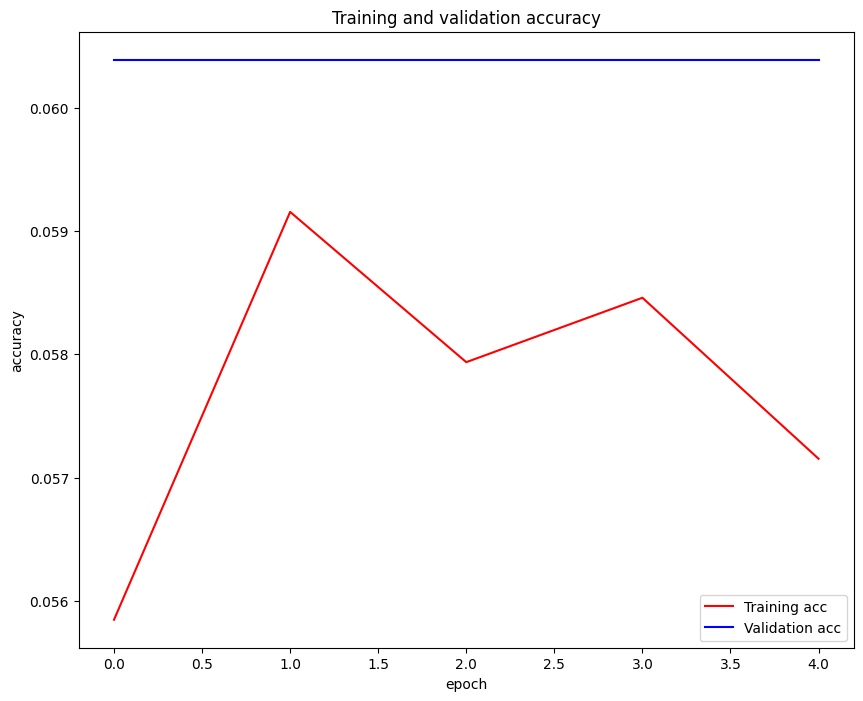

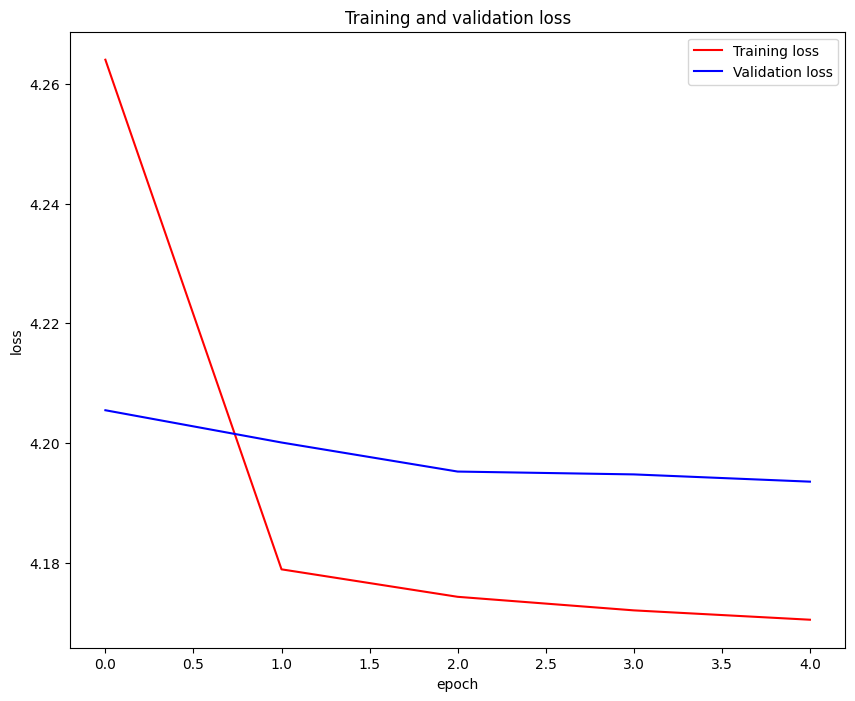

In [28]:
#Graphing our training and validation
plt.figure(figsize=(10,8))
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure(figsize=(10,8))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()
plt.show()

# ResNet model

In [30]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(150, 150, 3),
    pooling='avg',
    classes=104,
    weights='imagenet'
)

for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)


In [31]:
resnet_model.add(Flatten())
resnet_model.add(Dense(104, activation='softmax'))

In [34]:
resnet_model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
359/359 [==============================] - 46s 110ms/step - loss: 0.3130 - accuracy: 0.9137 - val_loss: 1.1509 - val_accuracy: 0.7192
Epoch 2/10
359/359 [==============================] - 41s 113ms/step - loss: 0.1943 - accuracy: 0.9546 - val_loss: 1.1276 - val_accuracy: 0.7247
Epoch 3/10
359/359 [==============================] - 39s 107ms/step - loss: 0.1402 - accuracy: 0.9726 - val_loss: 1.0799 - val_accuracy: 0.7451
Epoch 4/10
359/359 [==============================] - 41s 112ms/step - loss: 0.1092 - accuracy: 0.9800 - val_loss: 1.0950 - val_accuracy: 0.7443
Epoch 5/10
359/359 [==============================] - 39s 107ms/step - loss: 0.0873 - accuracy: 0.9866 - val_loss: 1.1082 - val_accuracy: 0.7451
Epoch 6/10
359/359 [==============================] - 39s 107ms/step - loss: 0.0685 - accuracy: 0.9917 - val_loss: 1.1090 - val_accuracy: 0.7490
Epoch 7/10
359/359 [==============================] - 38s 104ms/step - loss: 0.0580 - accuracy: 0.9929 - val_loss: 1.1349 - val_ac

In [36]:
resnet_model.evaluate(test_batches)

116/116 [==============================] - 658s 6s/step - loss: 10.9572 - accuracy: 0.0067


[10.957206726074219, 0.006734913680702448]

In [37]:
#F1 and predictions for transfer learning model : 
y_true,p=test(resnet_model,test_batches)
pred=[np.argmax(elements) for elements in p]
f1_score(y_true,pred, average='macro')

1/1 [==============================] - 0s 37ms/step


0.00012865111875012865

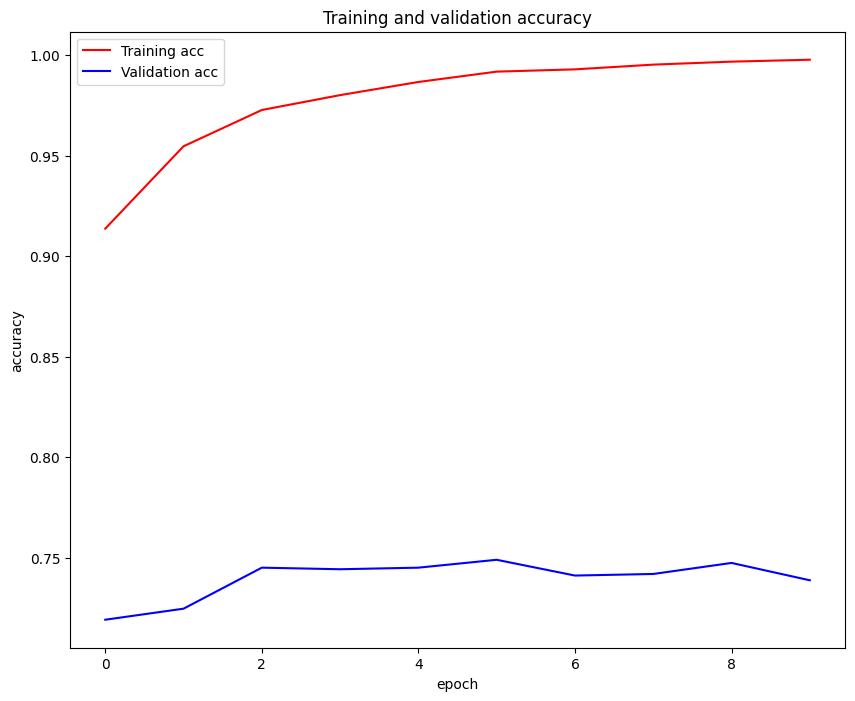

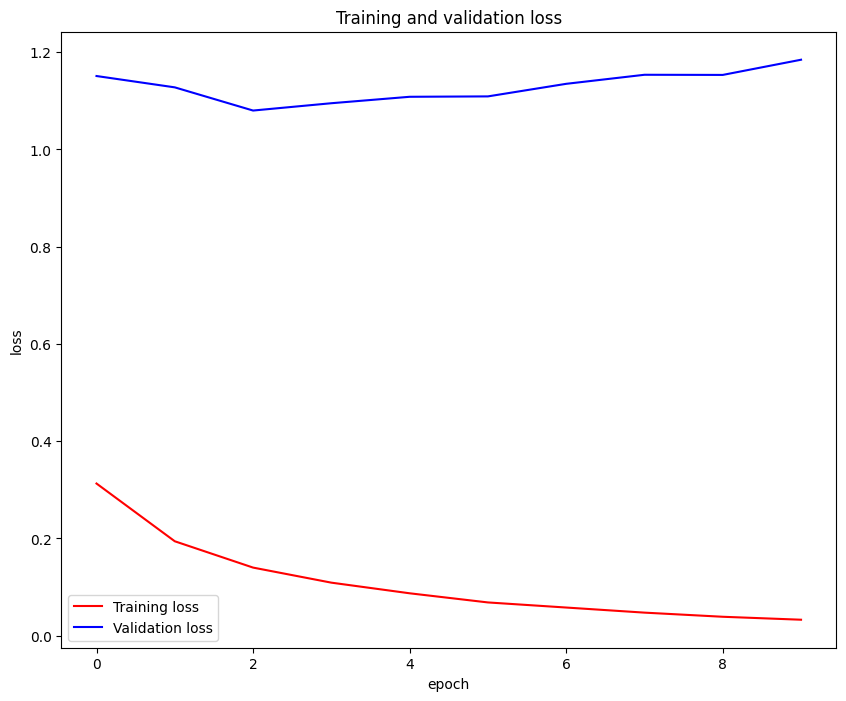

In [38]:
#Graphing our training and validation
plt.figure(figsize=(10,8))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure(figsize=(10,8))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()
plt.show()

# Ensemble using 2 models

In [57]:
models = [resnet_model, VGG_model]
model_input = tf.keras.Input(shape=(150, 150, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [58]:
ensemble_model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [59]:
ensemble_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential_3 (Sequential)      (None, 104)          23800808    ['input_4[0][0]']                
                                                                                                  
 model (Functional)             (None, 104)          84354984    ['input_4[0][0]']                
                                                                                                  
 average (Average)              (None, 104)          0           ['sequential_3[0][0]',     

In [60]:
ensemble_save = "/content/drive/MyDrive/NN/ensemble_model"
#ensemble_model.load_weights(ensemble_save)

In [61]:
#checkpoint5 = keras.callbacks.ModelCheckpoint(manual_save, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto',save_freq='epoch')
history5 = ensemble_model.fit(
  normalized_train,
  validation_data=normalized_val,
  epochs=10)
  #callbacks=[checkpoint5])

Epoch 1/10
359/359 [==============================] - 116s 293ms/step - loss: 4.2337 - accuracy: 0.0567 - val_loss: 4.1675 - val_accuracy: 0.0659
Epoch 2/10
359/359 [==============================] - 100s 275ms/step - loss: 4.1179 - accuracy: 0.0741 - val_loss: 4.1243 - val_accuracy: 0.0737
Epoch 3/10
359/359 [==============================] - 99s 274ms/step - loss: 4.0825 - accuracy: 0.0805 - val_loss: 4.1049 - val_accuracy: 0.0855
Epoch 4/10
359/359 [==============================] - 99s 274ms/step - loss: 4.0520 - accuracy: 0.0842 - val_loss: 4.0790 - val_accuracy: 0.0714
Epoch 5/10
359/359 [==============================] - 99s 274ms/step - loss: 4.0260 - accuracy: 0.0869 - val_loss: 4.0618 - val_accuracy: 0.0902
Epoch 6/10
359/359 [==============================] - 99s 275ms/step - loss: 4.0028 - accuracy: 0.0903 - val_loss: 4.0415 - val_accuracy: 0.0714
Epoch 7/10
359/359 [==============================] - 105s 288ms/step - loss: 3.9836 - accuracy: 0.0945 - val_loss: 4.0243 - val

In [62]:
ensemble_model.evaluate(test_batches)

116/116 [==============================] - 19s 142ms/step - loss: 3.9375 - accuracy: 0.0951


[3.9374818801879883, 0.09509698301553726]

In [63]:
#F1 and predictions for ensemble model : 
y_true,p=test(ensemble_model,test_batches)
pred=[np.argmax(elements) for elements in p]
f1_score(y_true,pred, average='macro')

1/1 [==============================] - 0s 38ms/step


0.016352760020116094

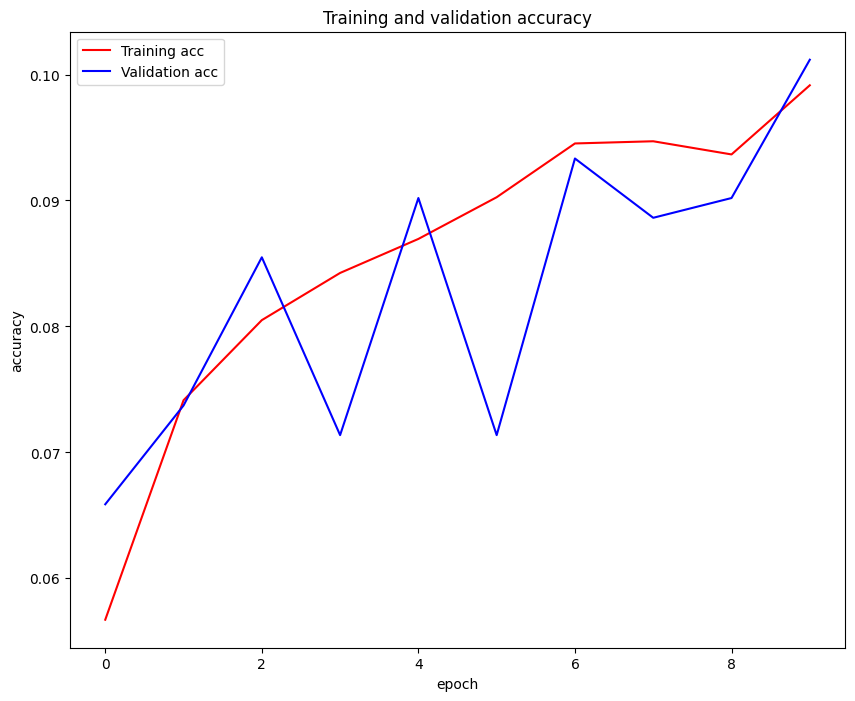

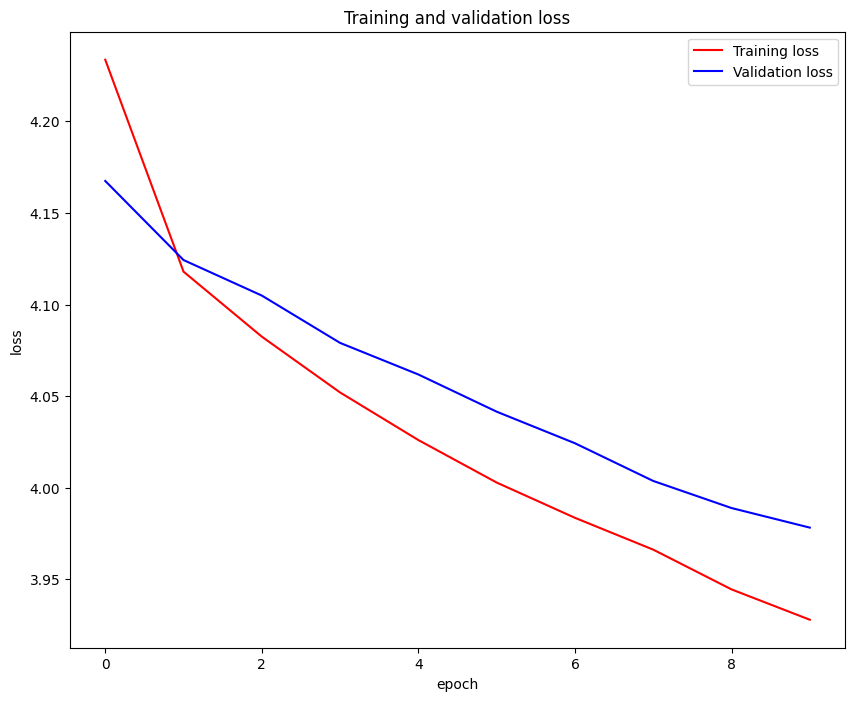

In [64]:
#Graphing our training and validation
plt.figure(figsize=(10,8))
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure(figsize=(10,8))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()
plt.show()

In [66]:
samples = {}
for folder in os.listdir('/content/drive/MyDrive/Data/train'):
  path = '/content/drive/MyDrive/Data/train' + '/' + folder
  count = 0
  for img in os.listdir(path):
    count +=1
    samples[CLASSES[int(folder)]] = count
samples

{'king protea': 92,
 'great masterwort': 26,
 'fire lily': 19,
 'prince of wales feathers': 21,
 'globe-flower': 21,
 'cosmos': 20,
 'sweet pea': 21,
 'red ginger': 19,
 'bolero deep blue': 18,
 'trumpet creeper': 31,
 'canna lily': 46,
 'ruby-lipped cattleya': 36,
 'tree mallow': 29,
 'mexican petunia': 41,
 'peruvian lily': 50,
 'alpine sea holly': 18,
 'californian poppy': 55,
 'canterbury bells': 20,
 'water lily': 167,
 'moon orchid': 18,
 'silverbush': 28,
 'lenten rose': 73,
 'magnolia': 120,
 'tiger lily': 87,
 'corn poppy': 83,
 'purple coneflower': 55,
 'love in the mist': 23,
 'osteospermum': 33,
 'monkshood': 87,
 'lilac hibiscus': 37,
 "colt's foot": 43,
 'clematis': 101,
 'balloon flower': 90,
 'garden phlox': 24,
 'bougainvillea': 131,
 'cautleya spicata': 27,
 'pink-yellow dahlia': 58,
 'hibiscus': 134,
 'spring crocus': 21,
 'watercress': 96,
 'bromelia': 34,
 'spear thistle': 263,
 'columbine': 112,
 'marigold': 125,
 'blanket flower': 24,
 'buttercup': 261,
 'sweet w

# Transfer Learning Model

In [47]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_train = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_val = val_ds.map(lambda x, y: (normalization_layer(x), y))
# to see results of normalization in one image
image_batch, labels_batch = next(iter(normalized_train))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print("minimum value => ", np.min(first_image), ", maximum value => ", np.max(first_image))
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

num_classes = 104

manual_model2 = tf.keras.Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, strides=(2,2), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(32, 3, strides=(2,2), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, 3, strides=(2,2), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Flatten(),
    layers.Dense(num_classes, activation='softmax')
])

manual_model2.build((None, image_batch.shape[1], image_batch.shape[2], image_batch.shape[3])) 

minimum value =>  0.0 , maximum value =>  1.0


In [48]:
manual_model2.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])
manual_model2.optimizer.get_config()

{'name': 'Adam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': True,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [49]:
manual_model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 75, 75, 16)        448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 37, 37, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 19, 19, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 9, 9, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 5, 5, 64)        

In [52]:
history411 =manual_model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50)

Epoch 1/50
359/359 [==============================] - 39s 106ms/step - loss: 2.8120 - accuracy: 0.2672 - val_loss: 2.8514 - val_accuracy: 0.2706
Epoch 2/50
359/359 [==============================] - 39s 107ms/step - loss: 2.7861 - accuracy: 0.2700 - val_loss: 2.7880 - val_accuracy: 0.2776
Epoch 3/50
359/359 [==============================] - 36s 99ms/step - loss: 2.7098 - accuracy: 0.2872 - val_loss: 2.7453 - val_accuracy: 0.2894
Epoch 4/50
359/359 [==============================] - 35s 95ms/step - loss: 2.6467 - accuracy: 0.3056 - val_loss: 2.7085 - val_accuracy: 0.3051
Epoch 5/50
359/359 [==============================] - 35s 97ms/step - loss: 2.5826 - accuracy: 0.3220 - val_loss: 2.7336 - val_accuracy: 0.3106
Epoch 6/50
359/359 [==============================] - 34s 94ms/step - loss: 2.5549 - accuracy: 0.3264 - val_loss: 2.6542 - val_accuracy: 0.3090
Epoch 7/50
359/359 [==============================] - 37s 102ms/step - loss: 2.5067 - accuracy: 0.3313 - val_loss: 2.6579 - val_accura

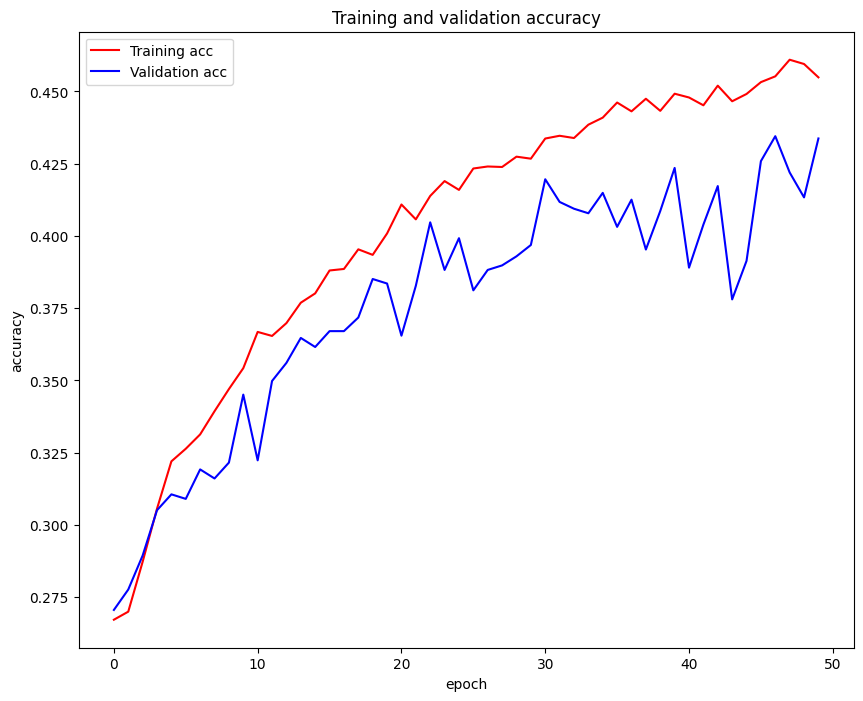

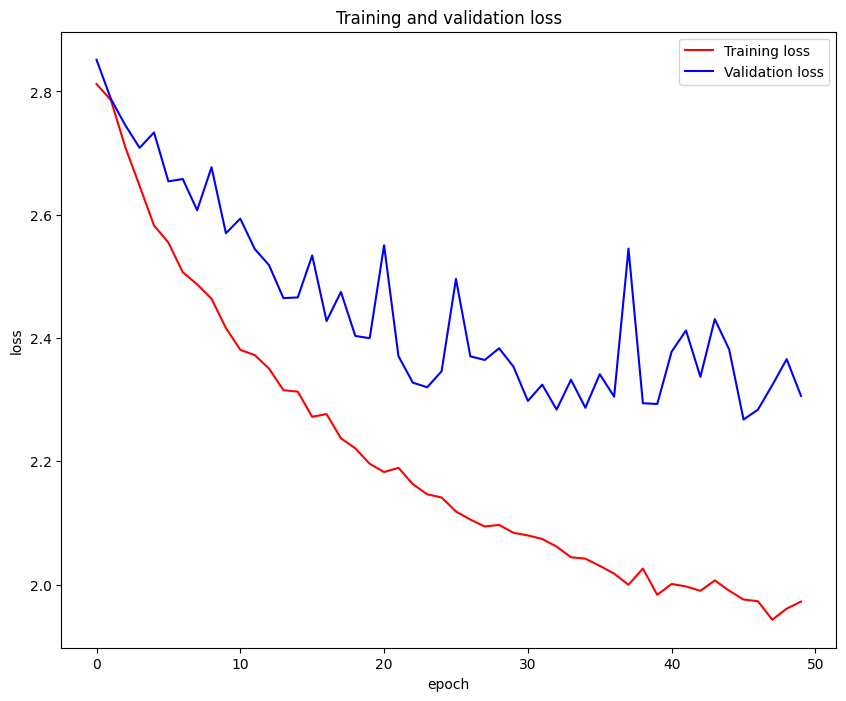

In [53]:
plt.figure(figsize=(10,8))
acc = history411.history['accuracy']
val_acc = history411.history['val_accuracy']
loss = history411.history['loss']
val_loss = history411.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure(figsize=(10,8))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()
plt.show()

In [54]:
VGG_model.compile(
  optimizer=Adam(learning_rate=0.0001,decay=0.1,amsgrad=True),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])
VGG_model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.0001,
 'decay': 0.1,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': True}

In [55]:
history255 =VGG_model.fit(
  normalized_train,
  validation_data=normalized_val,
  epochs=5)

Epoch 1/5
359/359 [==============================] - 99s 253ms/step - loss: 4.1655 - accuracy: 0.0614 - val_loss: 4.1975 - val_accuracy: 0.0604
Epoch 2/5
359/359 [==============================] - 83s 229ms/step - loss: 4.1635 - accuracy: 0.0614 - val_loss: 4.1970 - val_accuracy: 0.0604
Epoch 3/5
359/359 [==============================] - 83s 229ms/step - loss: 4.1631 - accuracy: 0.0614 - val_loss: 4.1967 - val_accuracy: 0.0604
Epoch 4/5
359/359 [==============================] - 84s 231ms/step - loss: 4.1629 - accuracy: 0.0614 - val_loss: 4.1965 - val_accuracy: 0.0604
Epoch 5/5
359/359 [==============================] - 83s 231ms/step - loss: 4.1627 - accuracy: 0.0614 - val_loss: 4.1963 - val_accuracy: 0.0604


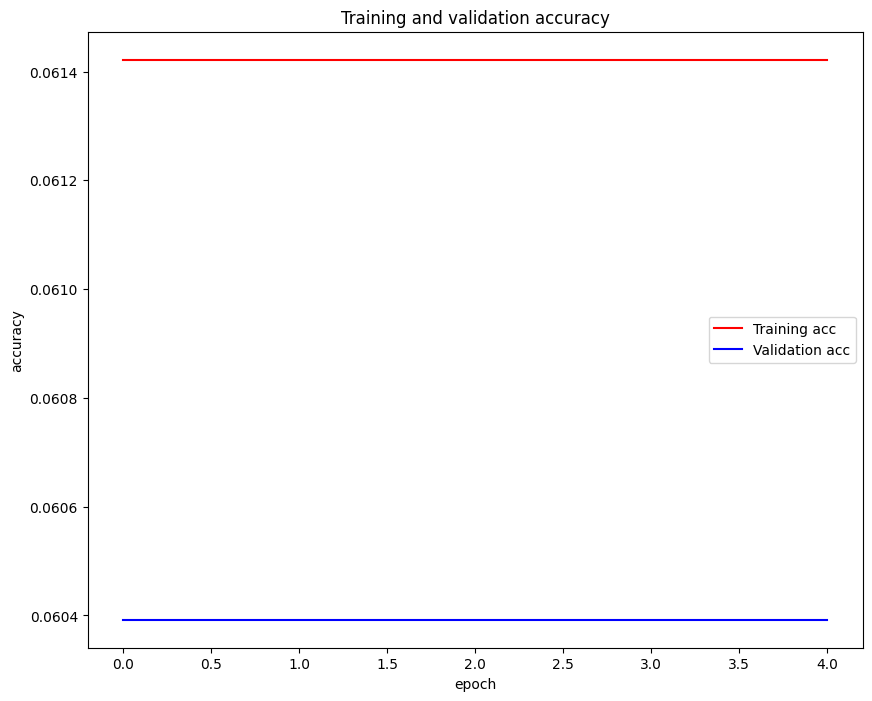

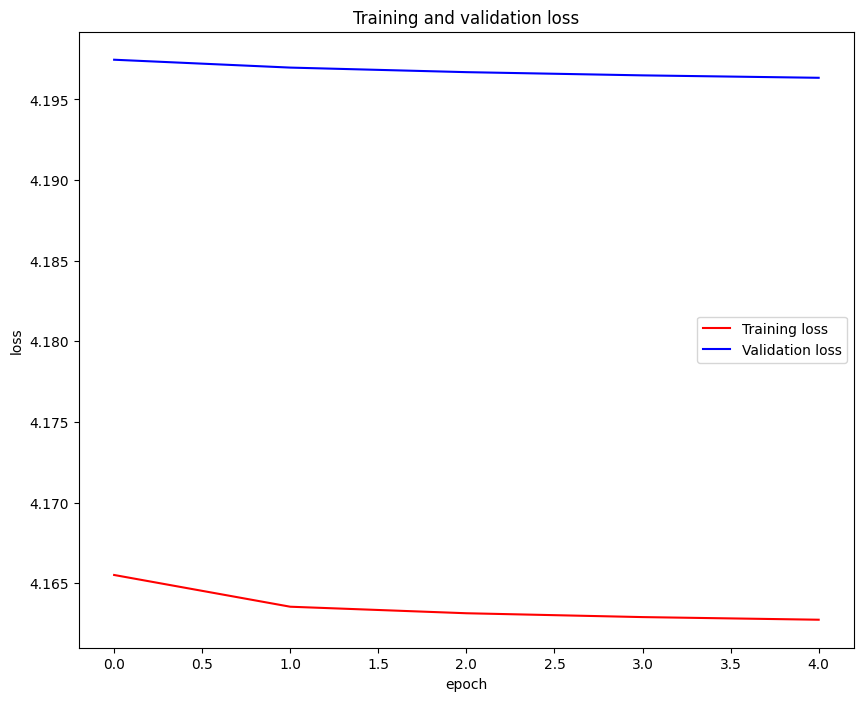

In [56]:
plt.figure(figsize=(10,8))
acc = history255.history['accuracy']
val_acc = history255.history['val_accuracy']
loss = history255.history['loss']
val_loss = history255.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure(figsize=(10,8))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()
plt.show()